#Ionosphere

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns

import matplotlib.pyplot as plt

# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

# metadata
print(ionosphere.metadata)

# variable information
print(ionosphere.variables)


{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from hmmlearn import hmm
classifier = hmm.GaussianHMM(n_components=2, covariance_type="full",n_iter = 1000 , algorithm = 'map')
classifier.fit(X_train)


GaussianHMM(algorithm='map', covariance_type='full', n_components=2,
            n_iter=1000)

Confusion Matrix : 
----------------------------------
Performance Report : 
              precision    recall  f1-score   support

           b       0.84      0.78      0.81        27
           g       0.87      0.91      0.89        44

    accuracy                           0.86        71
   macro avg       0.85      0.84      0.85        71
weighted avg       0.86      0.86      0.86        71



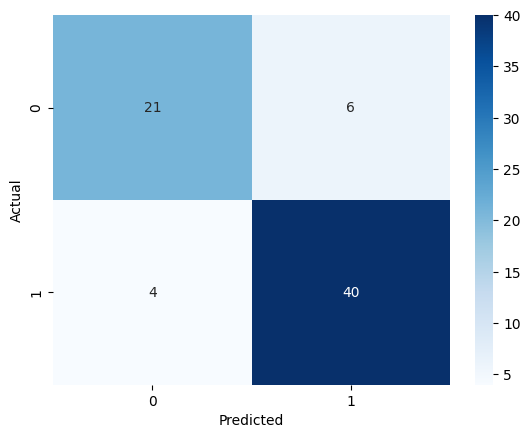

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report

label_map = {0: "b", 1: "g"}
y_pred_str = [label_map[val] for val in y_pred]

print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, y_pred_str), annot=True, fmt='d' , cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Actual')

print("----------------------------------")
print("Performance Report : ")
print(classification_report(y_test, y_pred_str))

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize both train and test
kb = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="uniform")
X_train_disc = kb.fit_transform(X_train).astype(int)
X_test_disc = kb.transform(X_test).astype(int)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 1 is constant and will be replaced with 0.
  warnings.warn(


In [ ]:
from hmmlearn.hmm import MultinomialHMM
import numpy as np

y_train = np.ravel(y_train)   # ensures shape (n_samples,)
y_test  = np.ravel(y_test)    # do the same for test


models = {}
for cls in np.unique(y_train):
    X_cls = X_train_disc[y_train == cls]
    lengths = [1] * len(X_cls)
    model = MultinomialHMM(n_components=2, n_iter=100)
    model.fit(X_cls, lengths)
    models[cls] = model

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


In [ ]:
# Example: convert each row into a sequence of length n_features
X_train_seq = [row.reshape(-1, 1) for row in X_train_disc]
X_test_seq  = [row.reshape(-1, 1) for row in X_test_disc]


In [ ]:
models = {}
for cls in np.unique(y_train):
    seqs = [row.reshape(-1, 1) for row in X_train_disc[y_train == cls]]
    lengths = [len(s) for s in seqs]
    X_concat = np.concatenate(seqs)

    model = MultinomialHMM(n_components=2, n_iter=100)
    model.fit(X_concat, lengths)
    models[cls] = model


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


In [ ]:
y_pred = []
for row in X_test_disc:
    x_seq = row.reshape(-1, 1)   # sequence of 34 timesteps, each categorical
    scores = {cls: model.score(x_seq) for cls, model in models.items()}
    best_class = max(scores, key=scores.get)
    y_pred.append(best_class)

y_pred = np.array(y_pred)


Confusion Matrix : 
----------------------------------
Performance Report : 
              precision    recall  f1-score   support

           b       0.00      0.00      0.00        27
           g       0.62      1.00      0.77        44

    accuracy                           0.62        71
   macro avg       0.31      0.50      0.38        71
weighted avg       0.38      0.62      0.47        71



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


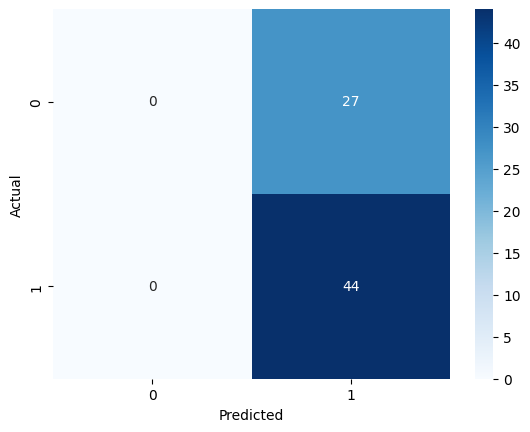

In [ ]:
# y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report

# label_map = {0: "b", 1: "g"}
# y_pred_str = [label_map[val] for val in y_pred]

print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d' , cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Actual')

print("----------------------------------")
print("Performance Report : ")
print(classification_report(y_test, y_pred))

# Brest Cancer :

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns

import matplotlib.pyplot as plt

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from hmmlearn import hmm
classifier = hmm.GaussianHMM(n_components=2, covariance_type="full",n_iter = 1000)
classifier.fit(X_train)

GaussianHMM(covariance_type='full', n_components=2, n_iter=1000)

Confusion Matrix : 
----------------------------------
Performance Report : 
              precision    recall  f1-score   support

           B       0.95      0.95      0.95        80
           M       0.88      0.88      0.88        34

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



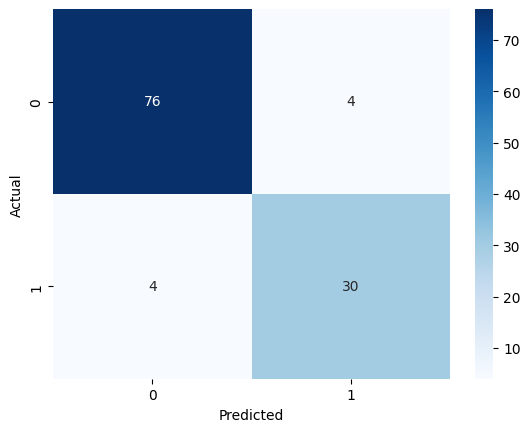

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report

label_map = {0: "B", 1: "M"}
y_pred_str = [label_map[val] for val in y_pred]

print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, y_pred_str), annot=True, fmt='d' , cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Actual')

print("----------------------------------")
print("Performance Report : ")
print(classification_report(y_test, y_pred_str))

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize both train and test
kb = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="uniform")
X_train_disc = kb.fit_transform(X_train).astype(int)
X_test_disc = kb.transform(X_test).astype(int)

In [ ]:
from hmmlearn.hmm import MultinomialHMM
import numpy as np

y_train = np.ravel(y_train)   # ensures shape (n_samples,)
y_test  = np.ravel(y_test)    # do the same for test


models = {}
for cls in np.unique(y_train):
    X_cls = X_train_disc[y_train == cls]
    lengths = [1] * len(X_cls)
    model = MultinomialHMM(n_components=2, n_iter=100)
    model.fit(X_cls, lengths)
    models[cls] = model

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


In [ ]:
X_train_seq = [row.reshape(-1, 1) for row in X_train_disc]
X_test_seq  = [row.reshape(-1, 1) for row in X_test_disc]

In [ ]:
models = {}
for cls in np.unique(y_train):
    seqs = [row.reshape(-1, 1) for row in X_train_disc[y_train == cls]]
    lengths = [len(s) for s in seqs]
    X_concat = np.concatenate(seqs)

    model = MultinomialHMM(n_components=4, n_iter=100, startprob_prior=1.0, transmat_prior=1.0 , algorithm = 'map',verbose=True)

    model.fit(X_concat, lengths)
    models[cls] = model

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
         1       0.00000000             +nan
         2       0.00000000      -0.00000000
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
         1       0.00000000             +nan
         2       0.00000000      -0.00000000


In [ ]:
y_pred = []
for row in X_test_disc:
    x_seq = row.reshape(-1, 1)   # sequence of 34 timesteps, each categorical
    scores = {cls: model.score(x_seq) for cls, model in models.items()}
    best_class = max(scores, key=scores.get)
    y_pred.append(best_class)

y_pred = np.array(y_pred)

Confusion Matrix : 
----------------------------------
Performance Report : 
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        80
           M       0.30      1.00      0.46        34

    accuracy                           0.30       114
   macro avg       0.15      0.50      0.23       114
weighted avg       0.09      0.30      0.14       114



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


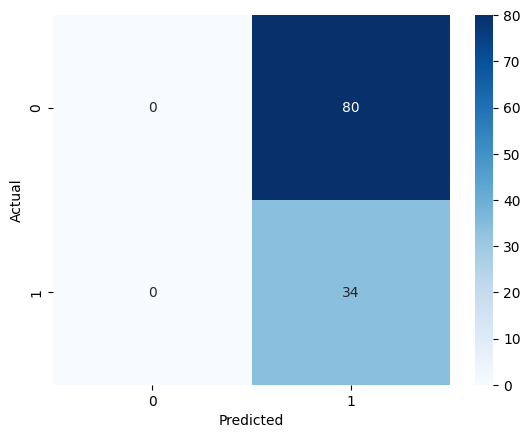

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report


print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d' , cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Actual')

print("----------------------------------")
print("Performance Report : ")
print(classification_report(y_test, y_pred))

#CNN : basic

#CIFAR10

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Check TensorFlow version (just to confirm Colab environment)
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
# Load CIFAR-10 data directly from Keras datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)

# Normalize pixel values (0–255 → 0–1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.3310 - loss: 1.7815 - val_accuracy: 0.5377 - val_loss: 1.2826
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 25ms/step - accuracy: 0.5532 - loss: 1.2398 - val_accuracy: 0.6013 - val_loss: 1.1299
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.6269 - loss: 1.0573 - val_accuracy: 0.6350 - val_loss: 1.0475
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6700 - loss: 0.9483 - val_accuracy: 0.6748 - val_loss: 0.9352
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6996 - loss: 0.8588 - val_accuracy: 0.6498 - val_loss: 1.0313
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7178 - loss: 0.8083 - val_accuracy: 0.6939 - val_loss: 0.8734
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.7368 - loss: 0.7431 - val_accuracy: 0.6896 - val_loss: 0.9061
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.7567 -

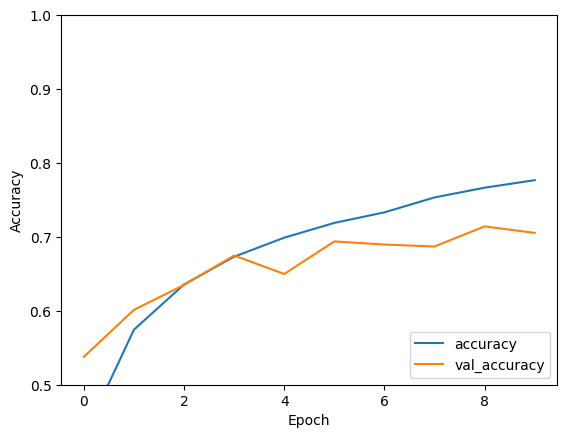

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss , test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(test_acc)

#MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Check TensorFlow version (just to confirm Colab environment)
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
# 3️⃣ Build CNN Model
# =============================
model = models.Sequential()

# Conv + Pool Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Conv + Pool Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Final Conv Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# First summary before flattening (to see convolution feature maps)
print("\n🔹 Model summary before Flatten:")
model.summary()

# Flatten + Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Output layer → 10 classes (digits 0–9)
model.add(layers.Dense(10))

# Final model summary
print("\n🔹 Final model summary:")
model.summary()


🔹 Model summary before Flatten:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)


🔹 Final model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8863 - loss: 0.3553 - val_accuracy: 0.9854 - val_loss: 0.0427
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9834 - loss: 0.0530 - val_accuracy: 0.9854 - val_loss: 0.0485
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9921 - val_loss: 0.0244
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9907 - val_loss: 0.0289
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9940 - loss: 0.0191 - val_accuracy: 0.9903 - val_loss: 0.0307
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9953 - loss: 0.0152 - val_accuracy: 0.9903 - val_loss: 0.0292
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9960 - loss: 0.0112 - val_accuracy: 0.9920 - val_loss: 0.0322
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9959 -

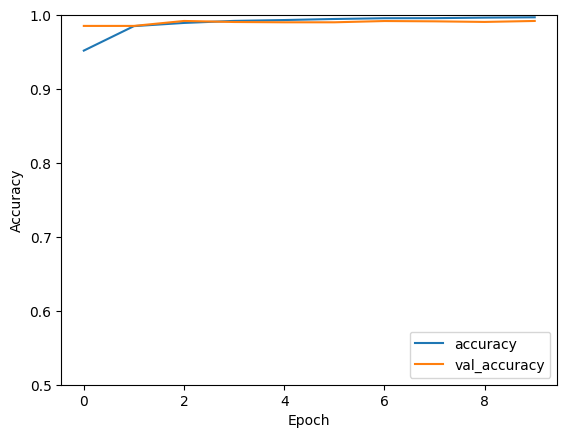

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss , test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(test_acc)

#Comparison :

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
Results_mnist = pd.DataFrame(
    index=["accuracy", "precision", "recall", "f1_score"]
)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def print_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    fscore = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:   {fscore:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy,precision,recall,fscore

#MNIST :

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)

# Normalize pixel values (0–255 → 0–1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


#VCG16

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils
import numpy as np

def VGG16(input_shape=(28, 28, 1), num_classes=10):
    """
    Simplified VGG16 adapted for MNIST (grayscale 28x28 images).
    Uses random initialization instead of ImageNet weights.
    """

    inputs = layers.Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 2
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 3
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Flatten + classifier
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name='vgg16')
    return model


In [ ]:
model = VGG16()
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,592,202 (9.89 MB)

 Trainable params: 2,592,202 (9.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=10)
# val_labels = to_categorical(val_labels, num_classes=10)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_images, labels,
    validation_split=0.1,
    epochs=60,
    batch_size=128
)

Epoch 1/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.7450 - loss: 0.8290 - val_accuracy: 0.9743 - val_loss: 0.0852
Epoch 2/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9749 - loss: 0.0801 - val_accuracy: 0.9853 - val_loss: 0.0485
Epoch 3/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9853 - loss: 0.0497 - val_accuracy: 0.9868 - val_loss: 0.0489
Epoch 4/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9883 - loss: 0.0375 - val_accuracy: 0.9865 - val_loss: 0.0485
Epoch 5/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9905 - loss: 0.0291 - val_accuracy: 0.9910 - val_loss: 0.0327
Epoch 6/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.9925 - val_loss: 0.0297
Epoch 7/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9893 - val_loss: 0.0397
Epoch 8/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9953 - loss: 0.0160 - val_acc

In [ ]:
y_pred_probs=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
y_pred = np.argmax(y_pred_probs,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Accuracy:  0.9950
Precision: 0.9950
Recall:    0.9950
F1-score:   0.9950


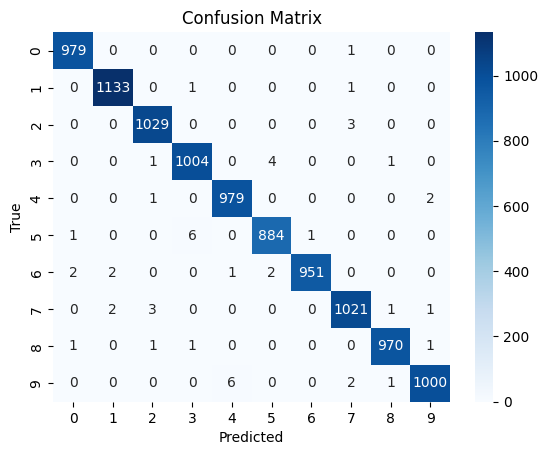

In [ ]:
res = print_classification_metrics(test_labels.flatten(), y_pred)

In [ ]:
Results_mnist['VGG16']=res
Results_mnist

,Custom Model,VGG16
accuracy,0.995600,0.995000
precision,0.995610,0.995004
recall,0.995600,0.995000
f1_score,0.995598,0.994999


#Alex Net :

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, datasets, utils
import numpy as np

def AlexNet(input_shape=(28, 28, 1), num_classes=10, l2_reg=0.0005):
    """
    Simplified AlexNet adapted for MNIST (28x28 grayscale images).
    Compatible with TensorFlow/Keras 2.x.
    """
    model = models.Sequential(name='alexnet_mnist')

    # Layer 1
    model.add(layers.Conv2D(96, (3, 3), padding='same',
                            kernel_regularizer=regularizers.l2(l2_reg),
                            input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    model.add(layers.Conv2D(1024, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Layer 5
    model.add(layers.Conv2D(1024, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [ ]:
model = AlexNet()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "alexnet_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 96)     │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 3, 3, 1024)     │     9,438,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 16,233,802 (61.93 MB)

 Trainable params: 16,226,442 (61.90 MB)

 Non-trainable params: 7,360 (28.75 KB)

In [ ]:
model.fit(
    train_images, labels,
    validation_split=0.1,
    epochs=60,
    batch_size=128
)

Epoch 1/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.8504 - loss: 0.5219 - val_accuracy: 0.1050 - val_loss: 5.3637
Epoch 2/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9847 - loss: 0.0684 - val_accuracy: 0.9890 - val_loss: 0.0421
Epoch 3/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9904 - loss: 0.0420 - val_accuracy: 0.9777 - val_loss: 0.0753
Epoch 4/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9933 - loss: 0.0292 - val_accuracy: 0.9897 - val_loss: 0.0377
Epoch 5/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9937 - loss: 0.0248 - val_accuracy: 0.9878 - val_loss: 0.0402
Epoch 6/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9943 - loss: 0.0208 - val_accuracy: 0.9858 - val_loss: 0.0508
Epoch 7/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9946 - loss: 0.0197 - val_accuracy: 0.9808 - val_loss: 0.0648
Epoch 8/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9967 - loss: 0.0131 - 

In [ ]:
y_pred_probs=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [ ]:
y_pred = np.argmax(y_pred_probs,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Accuracy:  0.9915
Precision: 0.9916
Recall:    0.9915
F1-score:   0.9915


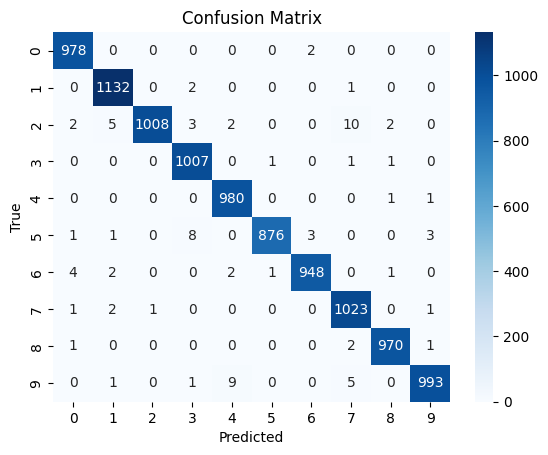

In [ ]:
res = print_classification_metrics(test_labels.flatten(), y_pred)

In [ ]:
Results_mnist['alexnet']=res
Results_mnist

,Custom Model,VGG16,alexnet
accuracy,0.995600,0.995000,0.991500
precision,0.995610,0.995004,0.991556
recall,0.995600,0.995000,0.991500
f1_score,0.995598,0.994999,0.991493


# GoogLe Net

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Concatenate, ZeroPadding2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3,
                     filters_5x5_reduce, filters_5x5, filters_pool_proj, name=None):
    conv_1x1 = Conv2D(filters_1x1, (1,1), padding='same', activation='relu', kernel_regularizer=l2(0.0002))(x)

    conv_3x3_reduce = Conv2D(filters_3x3_reduce, (1,1), padding='same', activation='relu', kernel_regularizer=l2(0.0002))(x)
    conv_3x3 = Conv2D(filters_3x3, (3,3), padding='same', activation='relu', kernel_regularizer=l2(0.0002))(conv_3x3_reduce)

    conv_5x5_reduce = Conv2D(filters_5x5_reduce, (1,1), padding='same', activation='relu', kernel_regularizer=l2(0.0002))(x)
    conv_5x5 = Conv2D(filters_5x5, (5,5), padding='same', activation='relu', kernel_regularizer=l2(0.0002))(conv_5x5_reduce)

    pool_proj = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1,1), padding='same', activation='relu', kernel_regularizer=l2(0.0002))(pool_proj)

    output = Concatenate(axis=-1, name=name)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    return output

def create_googlenet(input_shape=(28,28,1), num_classes=10):
    input_layer = Input(shape=input_shape)

    x = Conv2D(64, (5,5), strides=(1,1), padding='same', activation='relu')(input_layer)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    x = inception_module(x, 32, 48, 64, 8, 16, 16, name='inception_3a')
    x = inception_module(x, 64, 64, 96, 16, 48, 32, name='inception_3b')
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    x = inception_module(x, 64, 48, 96, 12, 24, 16, name='inception_4a')
    x = inception_module(x, 64, 64, 96, 16, 32, 24, name='inception_4b')
    x = AveragePooling2D(pool_size=(4,4), strides=(1,1), padding='valid')(x)

    x = Dropout(0.4)(x)
    x = Flatten()(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output,name="Google_net")
    return model

In [ ]:
model = create_googlenet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "Google_net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 28, 28,    │      1,664 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 14, 14,    │          0 │ conv2d_17[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 14, 14,    │      3,120 │ max_pooling2d_11… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 14, 14, 8) │        520 │ max_pooling2d_11… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 14, 14,    │          0 │ max_pooling2d_11… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 14, 14,    │      2,080 │ max_pooling2d_11… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 14, 14,    │     27,712 │ conv2d_19[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 14, 14,    │      3,216 │ conv2d_21[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 14, 14,    │      1,040 │ max_pooling2d_12… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_3a        │ (None, 14, 14,    │          0 │ conv2d_18[0][0],  │
│ (Concatenate)       │ 128)              │            │ conv2d_20[0][0],  │
│                     │                   │            │ conv2d_22[0][0],  │
│                     │                   │            │ conv2d_23[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 14, 14,    │      8,256 │ inception_3a[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 14, 14,    │      2,064 │ inception_3a[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 14, 14,    │          0 │ inception_3a[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 14, 14,    │      8,256 │ inception_3a[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 14, 14,    │     55,392 │ conv2d_25[0][0]   │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 355,790 (1.36 MB)

 Trainable params: 355,790 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    train_images, labels,
    validation_split=0.1,
    epochs=60,
    batch_size=128
)

Epoch 1/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.7056 - loss: 1.0392 - val_accuracy: 0.9850 - val_loss: 0.2106
Epoch 2/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9761 - loss: 0.2272 - val_accuracy: 0.9862 - val_loss: 0.1843
Epoch 3/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9815 - loss: 0.1920 - val_accuracy: 0.9890 - val_loss: 0.1635
Epoch 4/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9860 - loss: 0.1617 - val_accuracy: 0.9913 - val_loss: 0.1369
Epoch 5/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9879 - loss: 0.1420 - val_accuracy: 0.9932 - val_loss: 0.1192
Epoch 6/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9888 - loss: 0.1256 - val_accuracy: 0.9913 - val_loss: 0.1140
Epoch 7/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9892 - loss: 0.1122 - val_accuracy: 0.9912 - val_loss: 0.1048
Epoch 8/60
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9892 - loss: 0.1048 - val_acc

In [ ]:
y_pred_probs=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


In [ ]:
y_pred = np.argmax(y_pred_probs,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Accuracy:  0.9937
Precision: 0.9937
Recall:    0.9937
F1-score:   0.9937


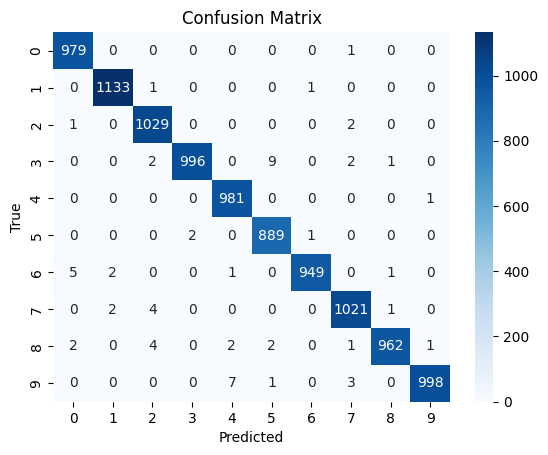

In [ ]:
res = print_classification_metrics(test_labels.flatten(), y_pred)

In [ ]:
Results_mnist['googlenet']=res
Results_mnist

,Custom Model,VGG16,alexnet,googlenet
accuracy,0.995600,0.995000,0.991500,0.993700
precision,0.995610,0.995004,0.991556,0.993729
recall,0.995600,0.995000,0.991500,0.993700
f1_score,0.995598,0.994999,0.991493,0.993698


#CIFER10 dataset :

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
labels = np.zeros((train_labels.shape[0],10))
labels.shape

(50000, 10)

In [ ]:
for i,val in enumerate(train_labels):
    labels[i][val[0]]=1.0

In [ ]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
input_shape=train_images[0].shape
input_shape

(32, 32, 3)

#VCG16 :

In [ ]:
model = VGG16(input_shape=input_shape)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,510,858 (13.39 MB)

 Trainable params: 3,510,858 (13.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    train_images, labels,
    validation_split=0.1,
    epochs=60,
    batch_size=128
)

Epoch 1/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.2720 - loss: 1.9699 - val_accuracy: 0.4500 - val_loss: 1.5034
Epoch 2/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4917 - loss: 1.3948 - val_accuracy: 0.5254 - val_loss: 1.3081
Epoch 3/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5587 - loss: 1.2204 - val_accuracy: 0.6164 - val_loss: 1.0752
Epoch 4/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6190 - loss: 1.0755 - val_accuracy: 0.6364 - val_loss: 1.0256
Epoch 5/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6622 - loss: 0.9596 - val_accuracy: 0.6742 - val_loss: 0.9320
Epoch 6/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7011 - loss: 0.8592 - val_accuracy: 0.6812 - val_loss: 0.9068
Epoch 7/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7271 - loss: 0.7849 - val_accuracy: 0.7058 - val_loss: 0.8451
Epoch 8/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7548 - loss: 0.7124 - val_acc

In [ ]:
y_pred_probs=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
y_pred = np.argmax(y_pred_probs,axis=1)
y_pred

array([5, 8, 8, ..., 5, 1, 7])

Accuracy:  0.7434
Precision: 0.7413
Recall:    0.7434
F1-score:   0.7403


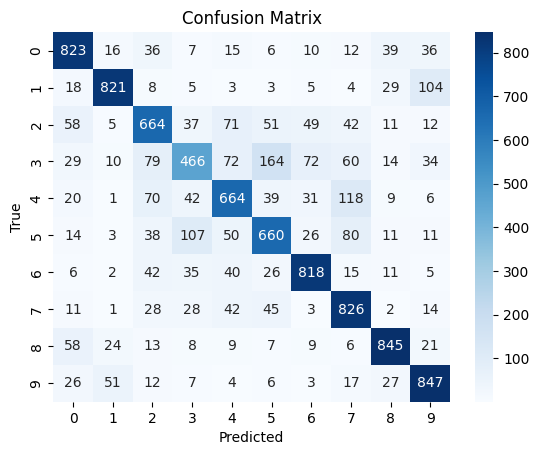

In [ ]:
res = print_classification_metrics(test_labels.flatten(), y_pred)

In [ ]:
Results_cifer10['vgg16']=res
Results_cifer10

,Custom Model,vgg16
accuracy,0.856700,0.743400
precision,0.858279,0.741296
recall,0.856700,0.743400
f1_score,0.854323,0.740272


#Alex Net :

In [ ]:
model = AlexNet(input_shape=input_shape)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "alexnet_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 4, 4, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 4, 4, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 4, 4, 1024)     │     9,438,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 17,808,394 (67.93 MB)

 Trainable params: 17,801,034 (67.91 MB)

 Non-trainable params: 7,360 (28.75 KB)

In [ ]:
model.fit(
    train_images, labels,
    validation_split=0.1,
    epochs=60,
    batch_size=128
)

Epoch 1/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 61ms/step - accuracy: 0.3364 - loss: 1.9780 - val_accuracy: 0.1470 - val_loss: 2.7591
Epoch 2/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.5759 - loss: 1.2195 - val_accuracy: 0.6510 - val_loss: 1.0178
Epoch 3/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6680 - loss: 0.9548 - val_accuracy: 0.6694 - val_loss: 0.9698
Epoch 4/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7314 - loss: 0.7822 - val_accuracy: 0.7044 - val_loss: 0.8629
Epoch 5/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7806 - loss: 0.6439 - val_accuracy: 0.7088 - val_loss: 0.8519
Epoch 6/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8283 - loss: 0.5169 - val_accuracy: 0.7172 - val_loss: 0.8108
Epoch 7/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8714 - loss: 0.3927 - val_accuracy: 0.7166 - val_loss: 0.8823
Epoch 8/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9071 - loss: 0.2910 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy:  0.7003
Precision: 0.7703
Recall:    0.7003
F1-score:   0.7095


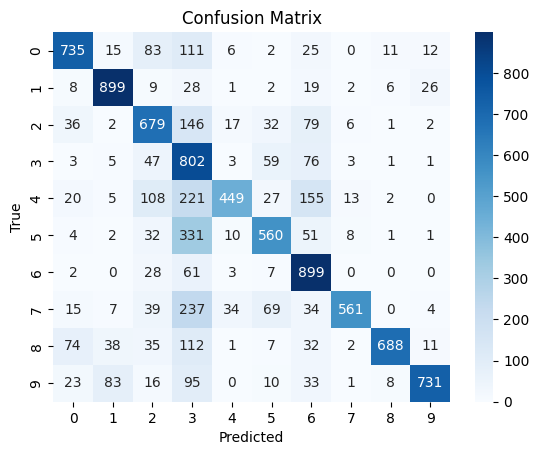

,Custom Model,vgg16,alexnet
accuracy,0.856700,0.743400,0.700300
precision,0.858279,0.741296,0.770272
recall,0.856700,0.743400,0.700300
f1_score,0.854323,0.740272,0.709453


In [ ]:
y_pred_probs=model.predict(test_images)
y_pred = np.argmax(y_pred_probs,axis=1)
res = print_classification_metrics(test_labels.flatten(), y_pred)
Results_cifer10['alexnet']=res
Results_cifer10

#GoogLe Net :

In [ ]:
model = create_googlenet(input_shape=input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "Google_net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 32, 32,    │      4,864 │ input_layer_7[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 16, 16,    │          0 │ conv2d_53[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 16, 16,    │      3,120 │ max_pooling2d_24… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 16, 16, 8) │        520 │ max_pooling2d_24… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 16, 16,    │          0 │ max_pooling2d_24… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 16, 16,    │      2,080 │ max_pooling2d_24… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 16, 16,    │     27,712 │ conv2d_55[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 16, 16,    │      3,216 │ conv2d_57[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 16, 16,    │      1,040 │ max_pooling2d_25… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_3a        │ (None, 16, 16,    │          0 │ conv2d_54[0][0],  │
│ (Concatenate)       │ 128)              │            │ conv2d_56[0][0],  │
│                     │                   │            │ conv2d_58[0][0],  │
│                     │                   │            │ conv2d_59[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 16, 16,    │      8,256 │ inception_3a[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 16, 16,    │      2,064 │ inception_3a[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 16, 16,    │          0 │ inception_3a[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 16, 16,    │      8,256 │ inception_3a[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 16, 16,    │     55,392 │ conv2d_61[0][0]   │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 378,430 (1.44 MB)

 Trainable params: 378,430 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import gc
collected_objects = gc.collect()
print(f"Number of objects collected: {collected_objects}")

Number of objects collected: 46159


In [ ]:
model.fit(
    train_images, labels,
    validation_split=0.1,
    epochs=60,
    batch_size=128
)

Epoch 1/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - accuracy: 0.2627 - loss: 2.1049 - val_accuracy: 0.4604 - val_loss: 1.5400
Epoch 2/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4757 - loss: 1.5184 - val_accuracy: 0.5350 - val_loss: 1.3837
Epoch 3/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5615 - loss: 1.3198 - val_accuracy: 0.6206 - val_loss: 1.1636
Epoch 4/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6068 - loss: 1.2034 - val_accuracy: 0.6524 - val_loss: 1.0889
Epoch 5/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6456 - loss: 1.1007 - val_accuracy: 0.6604 - val_loss: 1.0533
Epoch 6/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6687 - loss: 1.0403 - val_accuracy: 0.6876 - val_loss: 0.9829
Epoch 7/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7041 - loss: 0.9626 - val_accuracy: 0.7102 - val_loss: 0.9271
Epoch 8/60
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7233 - loss: 0.9027 - val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy:  0.7794
Precision: 0.7890
Recall:    0.7794
F1-score:   0.7820


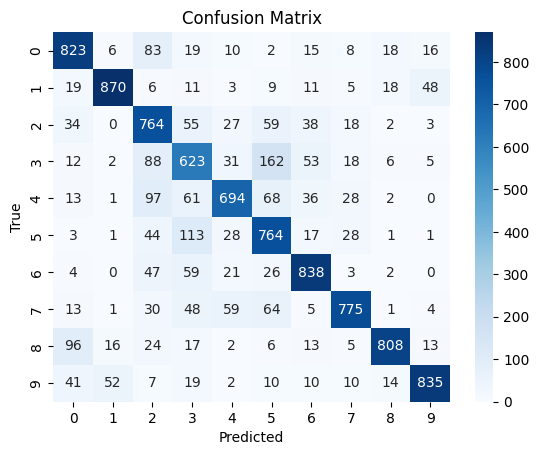

,Custom Model,vgg16,alexnet,googlenet
accuracy,0.856700,0.743400,0.700300,0.779400
precision,0.858279,0.741296,0.770272,0.789000
recall,0.856700,0.743400,0.700300,0.779400
f1_score,0.854323,0.740272,0.709453,0.781983


In [ ]:
y_pred_probs=model.predict(test_images)
y_pred = np.argmax(y_pred_probs,axis=1)
res = print_classification_metrics(test_labels.flatten(), y_pred)
Results_cifer10['googlenet']=res
Results_cifer10